In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 

In [3]:
titanic_data = pd.read_csv("titanic_train.csv")
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
titanic_data = titanic_data.dropna()
#Dropped rows with null columns 

In [5]:
titanic_data.columns
#Viewed the columns in the data set

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

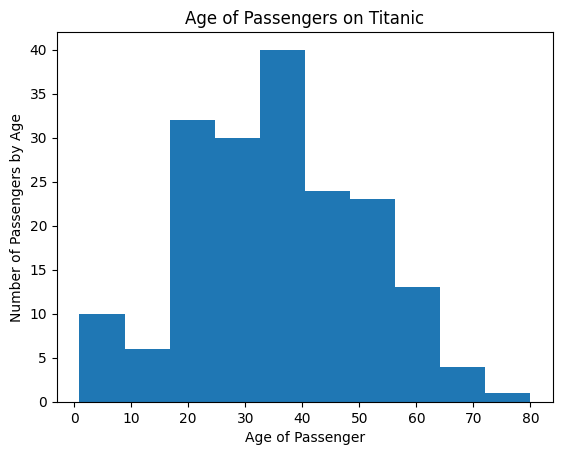

In [6]:
Pclass = titanic_data["Age"]
plt.hist(Pclass)
plt.xlabel("Age of Passenger")
plt.ylabel("Number of Passengers by Age")
plt.title("Age of Passengers on Titanic")
plt.savefig("figure.png")
#Make a histogram to show how many people on the titanic by age 

In [7]:
embarked_location = titanic_data["Embarked"].value_counts()
print(embarked_location)
#This shows the number of passengers on the titanic by embarkation location

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64


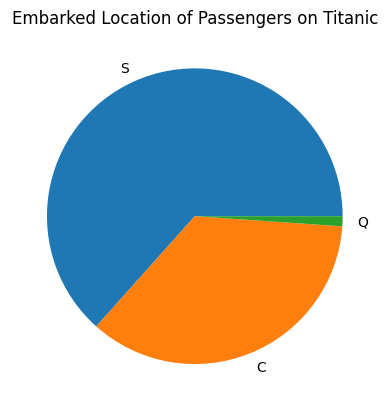

In [8]:
plt.pie(embarked_location, labels=embarked_location.index)
plt.title("Embarked Location of Passengers on Titanic")
plt.savefig("piefigure.png")
#Make pie chart to show above data as a visual 

In [9]:
fare = titanic_data["Fare"]
age = titanic_data["Age"]
linear_model = scipy.stats.linregress(age, fare)
print(linear_model)
#Found linear model for Fare and Age

LinregressResult(slope=np.float64(-0.4510625474955362), intercept=np.float64(94.77386642798255), rvalue=np.float64(-0.09242385620999946), pvalue=np.float64(0.21335794745107683), stderr=np.float64(0.36120231067743636), intercept_stderr=np.float64(14.063985642433579))


In [10]:
slope=linear_model.slope
intercept=linear_model.intercept 
linear_fit=age*slope+intercept
#Found linear fit by using values from above model

Text(50, 500, 'R = -0.4511*X + 94.7739')

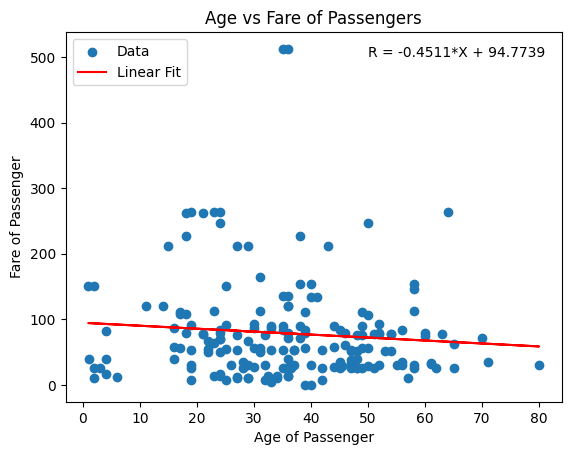

In [37]:
plt.scatter(age, fare, label="Data")
plt.xlabel("Age of Passenger")
plt.ylabel("Fare of Passenger")
plt.title("Age vs Fare of Passengers")
plt.plot(age, linear_fit, c="red", label="Linear Fit")
plt.legend()
plt.savefig("Scatter2.png")
plt.text(50, 500, "R = -0.4511*X + 94.7739")
# created a scatter plot of age and fare on titanic, and added a line of best fit

In [12]:
corr = scipy.stats.pearsonr(age, fare)
print("The correlation score is:", corr[0])
#found correlation score of age and fare 

The correlation score is: -0.0924238562099995


In [13]:
embarked_fare = pd.crosstab(titanic_data["Embarked"], titanic_data["Fare"])
print(embarked_fare)
#Used a contingency table to see connections of fare and embarkation location

Fare      0.0000    5.0000    7.6500    8.0500    10.4625   10.5000   \
Embarked                                                               
C                0         0         0         0         0         0   
Q                0         0         0         0         0         0   
S                2         1         3         1         2         4   

Fare      12.4750   12.8750   13.0000   13.7917   ...  151.5500  153.4625  \
Embarked                                          ...                       
C                0         1         0         1  ...         0         0   
Q                0         0         0         0  ...         0         0   
S                2         0         4         0  ...         3         3   

Fare      164.8667  211.3375  211.5000  227.5250  247.5208  262.3750  \
Embarked                                                               
C                0         0         1         2         2         2   
Q                0         0         

In [14]:
c, p, dof, expected = scipy.stats.chi2_contingency(embarked_fare)
#Did a chi squared test on embarkation location and fare

In [15]:
print("P-Value:", p)
#Found the p value 

P-Value: 0.00014853954260929248


In [16]:
age_fare = pd.crosstab(titanic_data["Age"], titanic_data["Fare"])
print(age_fare)
#repeated above process for age and fare

Fare   0.0000    5.0000    7.6500    8.0500    10.4625   10.5000   12.4750   \
Age                                                                           
0.92          0         0         0         0         0         0         0   
1.00          0         0         0         0         0         0         0   
2.00          0         0         0         0         1         0         0   
3.00          0         0         0         0         0         0         0   
4.00          0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
64.00         0         0         0         0         0         0         0   
65.00         0         0         0         0         0         0         0   
70.00         0         0         0         0         0         0         0   
71.00         0         0         0         0         0         0         0   
80.00         0         0         0         0       

In [17]:
c, p, dof, expected = scipy.stats.chi2_contingency(age_fare)
print("P-Value:", p)
#Found the p value for age and fare to be very high 

P-Value: 0.9890918385708714


In [18]:
parch_fare = pd.crosstab(titanic_data["Parch"], titanic_data["Fare"])
print(parch_fare)
#repeated process once again for parch and fare to see connections

Fare   0.0000    5.0000    7.6500    8.0500    10.4625   10.5000   12.4750   \
Parch                                                                         
0             2         1         3         1         0         4         0   
1             0         0         0         0         2         0         2   
2             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   

Fare   12.8750   13.0000   13.7917   ...  151.5500  153.4625  164.8667  \
Parch                                ...                                 
0             1         4         1  ...         0         1         0   
1             0         0         0  ...         0         2         0   
2             0         0         0  ...         3         0         1   
4             0         0         0  ...         0         0         0   

Fare   211.3375  211.5000  227.5250  247.5208  262.3750  263.0000  512.3292  
Pa

In [19]:
c, p, dof, expected = scipy.stats.chi2_contingency(parch_fare)
print(p)
#Found the p value to be less than 0.05 making this data statistically significant 

0.0199572267152305


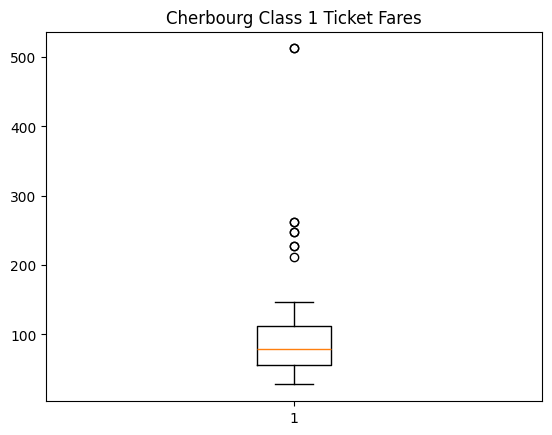

In [20]:
PClass1 = titanic_data[titanic_data["Pclass"]==1]
PClass1_C = PClass1[PClass1['Embarked']=='C']
plt.boxplot(PClass1_C["Fare"])
plt.title("Cherbourg Class 1 Ticket Fares")
plt.savefig("boxplot_c.png")
#Make a boxplot of Class 1 ticket fares by location of embarkation 

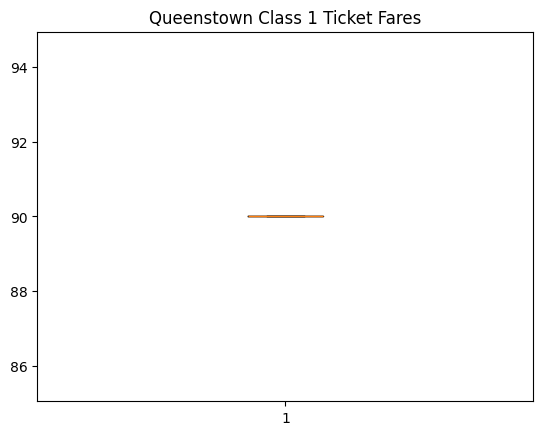

In [21]:
PClass1_Q = PClass1[PClass1['Embarked']=='Q']
plt.boxplot(PClass1_Q["Fare"])
plt.title("Queenstown Class 1 Ticket Fares")
plt.savefig("boxplot_q.png")
#Repeated for Queenstown

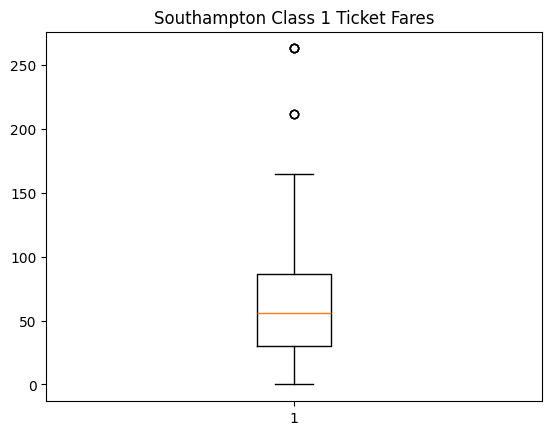

In [22]:
PClass_S = PClass1[PClass1['Embarked']=='S']
plt.boxplot(PClass_S["Fare"])
plt.title("Southampton Class 1 Ticket Fares")
plt.savefig("boxplot_s.png")
#Repeated for Southampton

In [23]:
titanic_data.corr(numeric_only=True)
#Looked at correlation scores in dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000
